# Metadata

1) ID number
2) Diagnosis (M = malignant, B = benign)

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

# Metadados
- Raio (média das distâncias do centro aos pontos no perímetro)
- Textura (desvio padrão dos valores de escala de cinza)
- Perímetro
- Área
- Suavidade (variação local nos comprimentos dos raios)
- Compacidade (perímetro² / área - 1,0)
- Concavidade (severidade das porções côncavas do contorno)
- Pontos côncavos (número de porções côncavas do contorno)
- Simetria
- Dimensão fractal ("aproximação da linha costeira" - 1)

1) Numero de Identificação
2) Diagnóstico (M = maligno, B = benigno)

# Importação de bibliotecas e base de dados

In [42]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Impotando a base de dados
BASE = pd.read_csv("Base/breast_cancer_wisconsin_diagnostic.csv")

# Entendendo as informações e estrutura geral do Dataset

In [44]:
# Entendendo o dataset
BASE.head()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [45]:
# Entendendo o dataset
BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raio1              569 non-null    float64
 1   textura1           569 non-null    float64
 2   perimetro1         569 non-null    float64
 3   area1              569 non-null    float64
 4   suavidade1         569 non-null    float64
 5   compacidade1       569 non-null    float64
 6   concavidade1       569 non-null    float64
 7   pontos_concavos1   569 non-null    float64
 8   simetria1          569 non-null    float64
 9   dimensao_fractal1  569 non-null    float64
 10  raio2              569 non-null    float64
 11  textura2           569 non-null    float64
 12  perimetro2         569 non-null    float64
 13  area2              569 non-null    float64
 14  suavidade2         569 non-null    float64
 15  compacidade2       569 non-null    float64
 16  concavidade2       569 non

In [46]:
# Entendendo o dataset
BASE.describe()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,raio3,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploração dos dados

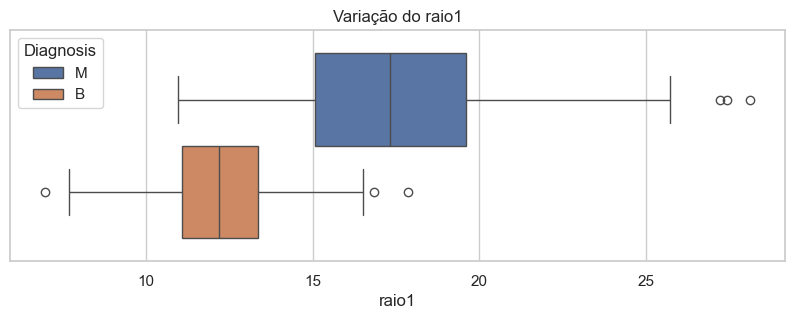

In [47]:
# Criando boxplot do raio1

plt.figure(figsize=(10, 3)) # Definindo tamanho da imagem

sns.set(style="whitegrid") # Definindo estilo da imagem

ax = sns.boxplot(x="raio1", hue='Diagnosis', data=BASE) # Plotando o gráfico

ax.set_title("Variação do raio1") # Inserindo título

plt.show() # Exibindo gráfico

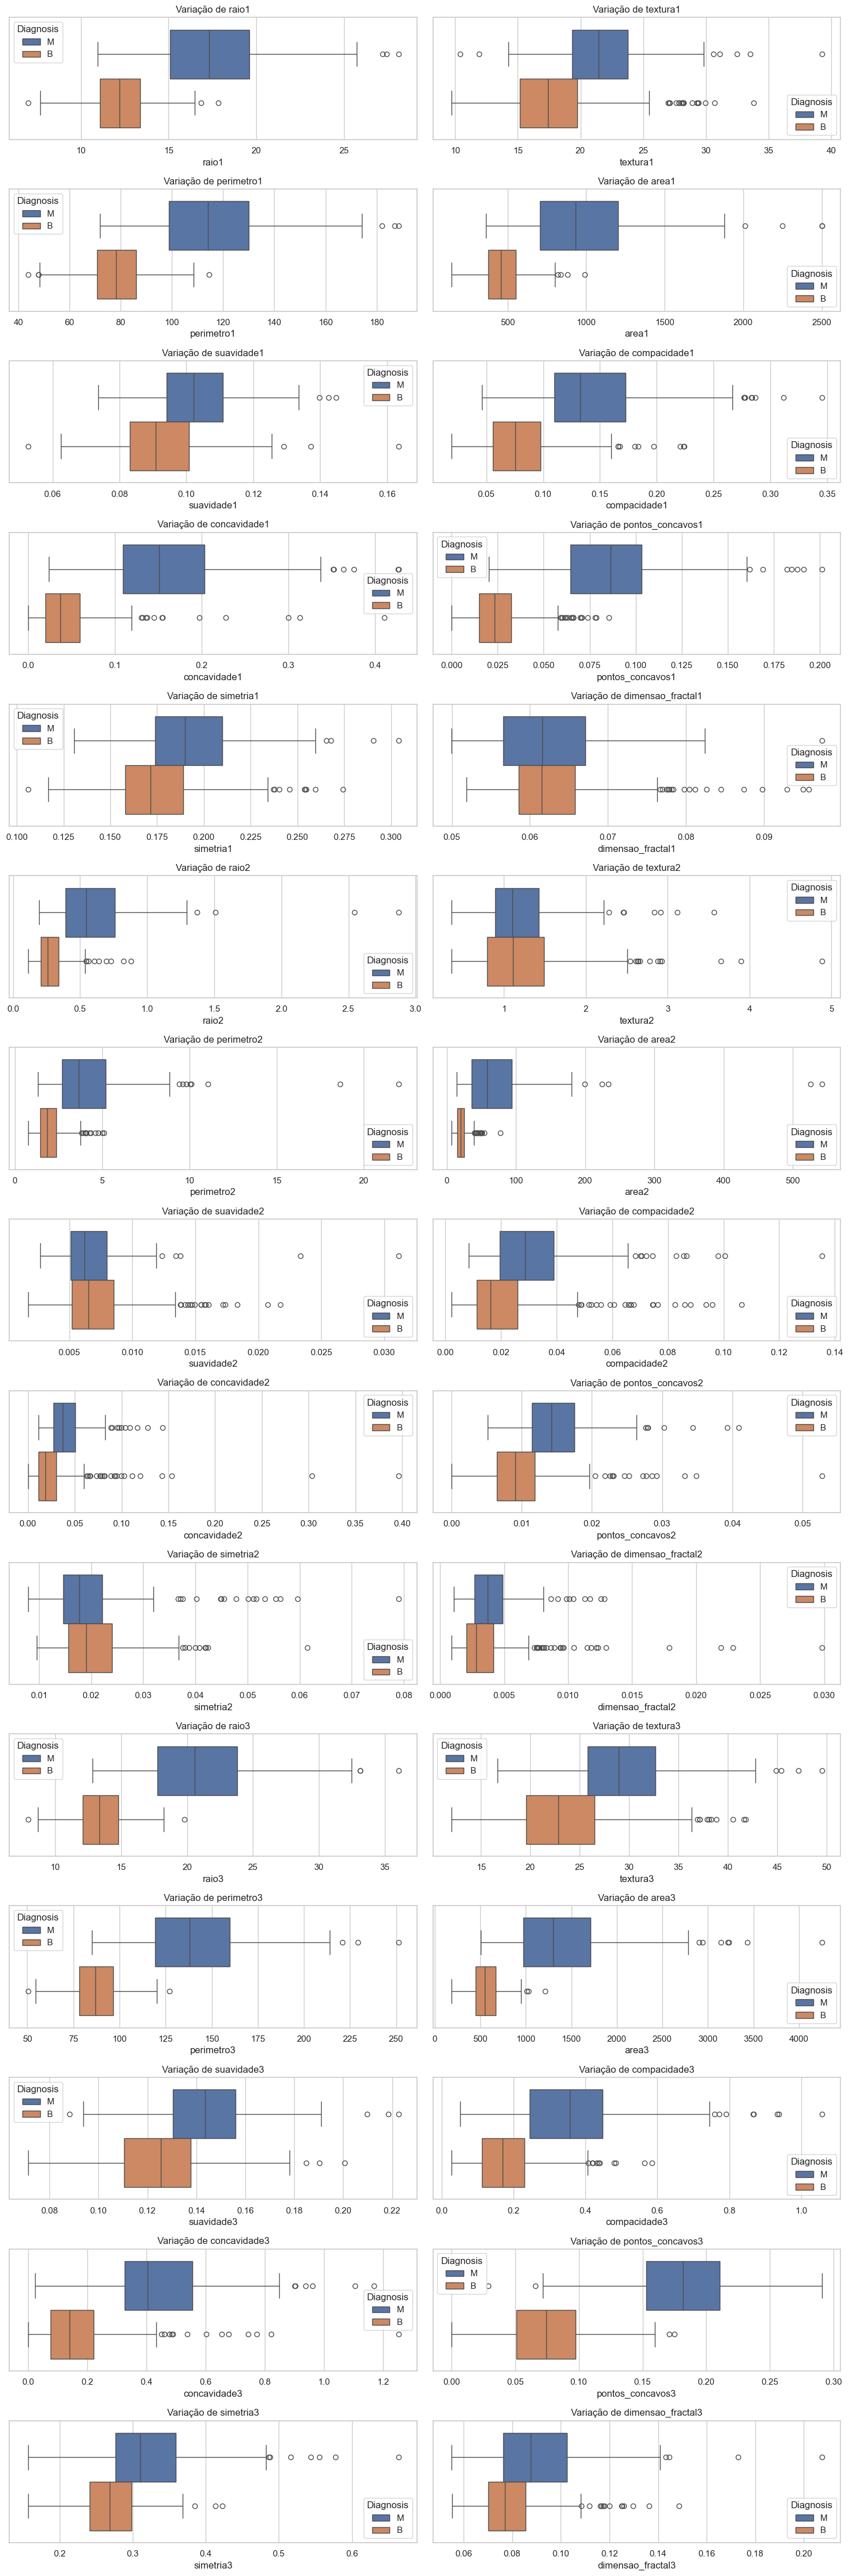

In [48]:
# Criando variável para receber todas as colunas como uma lista
variaveis = BASE.iloc[: , :-1].columns

fig, axs = plt.subplots(nrows=15, ncols=2, figsize=(15,45)) # Criando subplots

sns.set(style="whitegrid") # Definindo estilo da imagem

for i, variavel in enumerate(variaveis): # Loop que irá iterar sobre cada variável na lista variaveis
    ax = axs[i // 2, i % 2] # Acessando o subplot correto
    ax = sns.boxplot(x=variavel, hue='Diagnosis', data=BASE, ax = ax) # Plotando o gráfico no subplot
    ax.set_title(f'Variação de {variavel}') # Definindo título para cada gráfico com base nas colunas do dataset

plt.tight_layout() # Ajustando o layout para evitar sobreposições 
plt.show() # Exibindo gráfico

# Preparação e divisão dos dados
 - Não há dados faltantes no dataset;
 - Precisaremos apenas:
    - Fazer enconding;
    - Separar em treino e teste.

In [49]:
# Encodando a coluna target (Diagnosis)
BASE['Diagnosis'] = BASE['Diagnosis'].map({'M': 1, 'B': 0})

In [50]:
# Verificando se a coluna target foi alterada
BASE.head()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [51]:
# Separando variáveis independentes e dependentes
X = BASE.drop('Diagnosis', axis=1)
y = BASE[['Diagnosis']]

In [52]:
X.head() # Visualizando as variáveis independentes

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,raio3,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
y.head() # Visualizando as variáveis dependentes

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [55]:
# Dividindo os dados em conjunto de treinamento e teste
# O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste serve para avaliar o desempenho.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [60]:
# Verificando o tamanho dos dados de treino e teste
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (455, 30)
X_test: (114, 30)
y_train: (455, 1)
y_test: (114, 1)


# Criação e treinamento do modelo

In [61]:
# Criando o modelo de árvore de decisão
# Aqui utilizamos o algoritmo de Decision Tree, que é um modelo de classificação que divide os dados em subconjuntos baseados em feature values, formando uma estrutura de árvore.
model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com o conjunto de treinamento
# O modelo é treinado utilizando o conjunto X_train (features) e y_train (rótulos). Durante o treinamento, o algoritmo aprende a dividir os dados em uma estrutura de árvore que maximiza a separação das classes.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Visualização da árvore de decisão

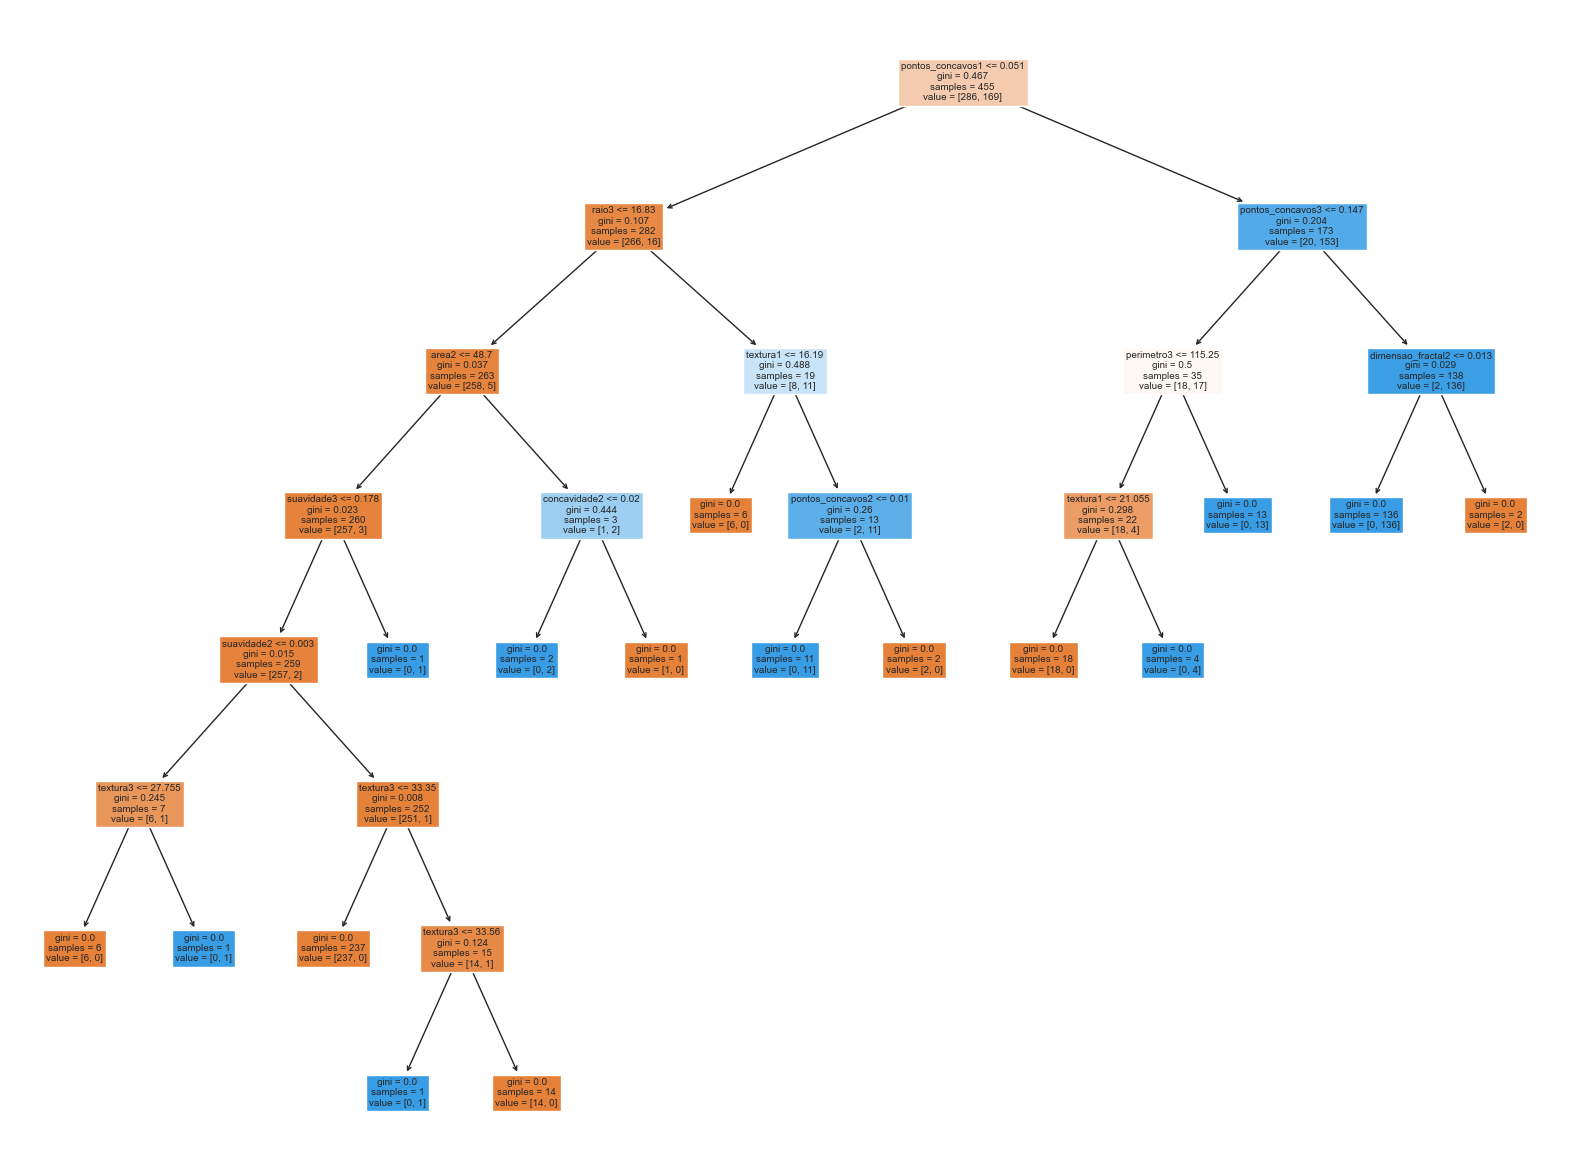

In [68]:
# Plotando a árvore

nomes_variaveis = X.columns # Recebendo os nomes das variáveis de X

plt.figure(figsize=(20, 15)) # Definindo tamanho da imagem

tree.plot_tree(model, feature_names=nomes_variaveis, filled=True) # Plotando árvore de decisão com os nomes de cada variável
# Visualizando a árvore de decisão com as features nomeadas
# A função plot_tree permite visualizar a estrutura da árvore gerada, mostrando os pontos de decisão. O argumento 'filled=True' preenche os nós com cores representativas da pureza (nós com maior pureza são mais fortes).

plt.show() # Exibe o gráfico

# Fazendo predições

In [71]:
# Realizando previsões no conjunto de teste
# O método predict utiliza o modelo treinado para realizar previsões nas amostras de X_test, retornando as classes previstas.
y_pred = model.predict(X_test) 
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

# Métricas de avaliação do modelo

In [91]:
# Avaliando o desempenho do modelo
# A acurácia mede a proporção de previsões corretas.
# O recall indica a capacidade do modelo de encontrar todas as instâncias da classe positiva.
# A precisão mostra a proporção de previsões positivas corretas.
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Acurácia: {accuracy * 100 :.2f}%')
print(f'Recall: {recall * 100 :.2f}%')
print(f'Precisão: {precision * 100 :.2f}%')

Acurácia: 94.74%
Recall: 93.02%
Precisão: 93.02%
